# IMPORT

In [93]:
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# from ipywidgets import widgets

from pandas_profiling import ProfileReport
import sweetviz as sv

# DEFINE

In [2]:
DATA_PATH = '../data/'

# PREPARATION

In [44]:
train = pd.read_csv(DATA_PATH+'train.csv')
test = pd.read_csv(DATA_PATH+'test.csv')

- **Restaurant_id** — идентификационный номер ресторана / сети ресторанов;
- **City** — город, в котором находится ресторан;
- **Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- **Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;
- **Rating (target)** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- **Price Range** — диапазон цен в ресторане;
- **Number of Reviews** — количество отзывов о ресторане;
- **Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;
- **URL_TA** — URL страницы ресторана на TripAdvosor;
- **ID_TA** — идентификатор ресторана в базе данных TripAdvisor.

## TRAIN

In [4]:
train.head(10)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,['Italian'],826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


In [5]:
train.tail(10)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
39990,id_1187,Oporto,"['European', 'Portuguese']",1188.0,4.5,NaN,14.0,"[['Traditional ""home cooked"" food for an ""eco....",/Restaurant_Review-g189180-d3612719-Reviews-D_...,d3612719
39991,id_6655,Paris,"['French', 'Contemporary', 'Fusion', 'Gastropub']",6656.0,5.0,$$ - $$$,5.0,"[[], []]",/Restaurant_Review-g187147-d13224611-Reviews-L...,d13224611
39992,id_13,Stockholm,"['Swedish', 'Scandinavian', 'Vegetarian Friend...",14.0,4.5,$$ - $$$,1162.0,"[['Great Viking Dinner', 'A foot stompingly go...",/Restaurant_Review-g189852-d2560559-Reviews-Ai...,d2560559
39993,id_6057,Paris,NaN,6058.0,4.0,NaN,16.0,"[['Naught but VERY nice', 'Yum'], ['01/23/2017...",/Restaurant_Review-g187147-d10532509-Reviews-B...,d10532509
39994,id_7074,Paris,"['French', 'Fast Food', 'Mediterranean', 'Heal...",7075.0,4.5,$$ - $$$,6.0,"[[], []]",/Restaurant_Review-g187147-d12621988-Reviews-C...,d12621988
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838
39999,id_4824,Milan,['Spanish'],4827.0,3.0,$$ - $$$,260.0,"[['Average', 'Nice an informal'], ['01/31/2016...",/Restaurant_Review-g187849-d1109020-Reviews-Ta...,d1109020


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Ranking,40000.0,3676.028525,3708.749567,1.0,973.0,2285.0,5260.0,16444.0
Rating,40000.0,3.993037,0.668417,1.0,3.5,4.0,4.5,5.0
Number of Reviews,37457.0,124.825480,295.666352,2.0,9.0,33.0,115.0,9660.0


In [8]:
train.describe(include=['O']).T

,count,unique,top,freq
Restaurant_id,40000,11909,id_633,18
City,40000,31,London,5757
Cuisine Style,30717,9007,['Italian'],1032
Price Range,26114,3,$$ - $$$,18412
Reviews,40000,33516,"[[], []]",6471
URL_TA,40000,39980,/Restaurant_Review-g187514-d1315077-Reviews-El...,2
ID_TA,40000,39980,d8753348,2


In [9]:
# Missing values
# msno.matrix(train)

## TEST

In [10]:
test.head(10)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354
5,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643
6,id_6,Lisbon,"['European', 'Portuguese']",3704.0,$,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873
7,id_7,Budapest,NaN,2330.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542
9,id_9,Stockholm,['Italian'],605.0,NaN,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384


In [11]:
test.tail(10)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
9990,id_9990,Rome,"['Italian', 'Pizza', 'Mediterranean', 'Fast Fo...",1307.0,$,67.0,"[['When in Rome you must visit', 'Amazing!!'],...",/Restaurant_Review-g187791-d10109492-Reviews-P...,d10109492
9991,id_9991,London,"['American', 'Bar']",8663.0,$$ - $$$,57.0,"[['It’s a generation thing', ""It's good""], ['1...",/Restaurant_Review-g186338-d720745-Reviews-Laz...,d720745
9992,id_9992,London,"['Bar', 'British', 'Pub', 'Gastropub', 'Vegeta...",4425.0,$$ - $$$,53.0,"[['Great venue for celebrations and events, v....",/Restaurant_Review-g186338-d8125462-Reviews-Th...,d8125462
9993,id_9993,Oporto,"['European', 'Portuguese']",742.0,$$ - $$$,5.0,"[['Must Go!', ""Go see these guys, they're grea...",/Restaurant_Review-g189180-d12447202-Reviews-S...,d12447202
9994,id_9994,Lisbon,"['Mediterranean', 'European', 'Portuguese']",813.0,$$ - $$$,119.0,"[['Waiting horror', 'Perfect Destination Weddi...",/Restaurant_Review-g189158-d6976663-Reviews-Pa...,d6976663
9995,id_9995,London,"['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...",4367.0,$,28.0,[['By far best Chicken burgers and wings in L....,/Restaurant_Review-g186338-d11916827-Reviews-C...,d11916827
9996,id_9996,Lisbon,"['Indian', 'Asian', 'Nepali', 'Bangladeshi']",2612.0,$$ - $$$,2.0,"[['Ok indian food'], ['11/25/2017']]",/Restaurant_Review-g189158-d12701633-Reviews-C...,d12701633
9997,id_9997,Milan,NaN,5562.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d13198194-Reviews-Q...,d13198194
9998,id_9998,Milan,['Italian'],4010.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d3862815-Reviews-La...,d3862815
9999,id_9999,Paris,NaN,6791.0,NaN,14.0,"[['Ethiopian Dining in Pleasant Space'], ['07/...",/Restaurant_Review-g187147-d10342814-Reviews-L...,d10342814


In [12]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Ranking,10000.0,3618.02350,3665.076451,2.0,966.0,2257.0,5137.0,16443.0
Number of Reviews,9343.0,123.05084,287.819368,2.0,9.0,32.0,114.0,6437.0


In [13]:
test.describe(include=['O']).T

,count,unique,top,freq
Restaurant_id,10000,10000,id_8548,1
City,10000,31,London,1436
Cuisine Style,7693,3128,['Italian'],300
Price Range,6525,3,$$ - $$$,4629
Reviews,9998,8358,"[[], []]",1641
URL_TA,10000,10000,/Restaurant_Review-g187147-d1916013-Reviews-Le...,1
ID_TA,10000,10000,d4402846,1


In [14]:
# Missing values
# msno.matrix(test)

In [45]:
def concat_data(train, test):
    
    train['sample'] = 1
    test['sample'] = 0
    
    data = pd.concat([train, test], sort=False)
    
    data = data.rename(columns={'Number of Reviews': 'Number_of_Reviews',
                            'Price Range': 'Price_Range',
                            'Cuisine Style': 'Cuisine_Style'})
    
    return data

In [46]:
data = concat_data(train, test)

# FEATURES

## Restaurant_id

In [17]:
data['Restaurant_id']

0       id_5569
1       id_1535
2        id_352
3       id_3456
4        id_615
         ...   
9995    id_9995
9996    id_9996
9997    id_9997
9998    id_9998
9999    id_9999
Name: Restaurant_id, Length: 50000, dtype: object

## City

In [18]:
data['City']

0           Paris
1       Stockholm
2          London
3          Berlin
4          Munich
          ...    
9995       London
9996       Lisbon
9997        Milan
9998        Milan
9999        Paris
Name: City, Length: 50000, dtype: object

In [19]:
data['City'].value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

In [20]:
data['City'].unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

## Cuisine Style

In [21]:
data['Cuisine_Style']

0                 ['European', 'French', 'International']
1                                                     NaN
2       ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                     NaN
4       ['German', 'Central European', 'Vegetarian Fri...
                              ...                        
9995    ['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...
9996         ['Indian', 'Asian', 'Nepali', 'Bangladeshi']
9997                                                  NaN
9998                                          ['Italian']
9999                                                  NaN
Name: Cuisine_Style, Length: 50000, dtype: object

In [22]:
data['Cuisine_Style'].isnull().value_counts()

False    38410
True     11590
Name: Cuisine_Style, dtype: int64

In [23]:
data[data['Cuisine_Style'].isnull()]

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,sample
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536,1
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029,1
10,id_6578,Barcelona,NaN,6579.0,3.0,NaN,6.0,"[[], []]",/Restaurant_Review-g187497-d10696479-Reviews-R...,d10696479,1
...,...,...,...,...,...,...,...,...,...,...,...
9982,id_9982,Berlin,NaN,5500.0,NaN,NaN,9.0,"[['Excellent doner', 'The best dönerkebab in B...",/Restaurant_Review-g187323-d5826612-Reviews-Gr...,d5826612,0
9983,id_9983,Paris,NaN,9597.0,NaN,NaN,24.0,"[['Local Dining Experience', 'Great traditiona...",/Restaurant_Review-g187147-d6509800-Reviews-Le...,d6509800,0
9986,id_9986,Warsaw,NaN,2018.0,NaN,NaN,24.0,"[['Good Lunch Place', 'That was a tasty burger...",/Restaurant_Review-g274856-d8484936-Reviews-Bo...,d8484936,0
9997,id_9997,Milan,NaN,5562.0,NaN,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d13198194-Reviews-Q...,d13198194,0


## Ranking

In [24]:
data['Ranking'].describe()

count    50000.000000
mean      3664.427520
std       3700.092452
min          1.000000
25%        972.000000
50%       2278.000000
75%       5241.000000
max      16444.000000
Name: Ranking, dtype: float64

## Price Range

In [25]:
data['Price_Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price_Range, dtype: int64

In [26]:
data['Price_Range'].isnull().value_counts()

False    32639
True     17361
Name: Price_Range, dtype: int64

## Number_of_Reviews

In [27]:
data['Number_of_Reviews'].isnull().value_counts()

False    46800
True      3200
Name: Number_of_Reviews, dtype: int64

In [28]:
data['Number_of_Reviews'].describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number_of_Reviews, dtype: float64

## Rating

In [29]:
data['Rating'].value_counts()

4.0    13692
4.5    10929
3.5     6824
5.0     3879
3.0     2955
2.5      915
2.0      466
1.0      201
1.5      139
Name: Rating, dtype: int64

In [30]:
train['Restaurant_id'].nunique()

11909

# Preprocessing

In [47]:
def data_preproc(data):
    
    # =============== Restaurant id ================
    print('Restaurant id prep...', end='')
    Restaurant_id_dict = data['Restaurant_id'].value_counts().to_dict()
    
    def network_search(data_id):

        if data_id in Restaurant_id_dict and Restaurant_id_dict[data_id] > 1:
            return 1
        else:
            return 0
    
    # New feature 'Restaurant_network'
    data['Restaurant_network'] = data['Restaurant_id'].apply(network_search)
    print('done')
    # =============== City ===============
    print('City id prep...', end='')
    city_country = {
        'London': 'UK',
        'Paris': 'France',
        'Madrid': 'Spain',
        'Barcelona': 'Spain',
        'Berlin': 'Germany',
        'Milan': 'Italy',
        'Rome': 'Italy',
        'Prague': 'Czech',
        'Lisbon': 'Portugalia',
        'Vienna': 'Austria',
        'Amsterdam': 'Nederlands',
        'Brussels': 'Belgium',
        'Hamburg': 'Germany',
        'Munich': 'Germany',
        'Lyon': 'France',
        'Stockholm': 'Sweden',
        'Budapest': 'Hungary',
        'Warsaw': 'Poland',
        'Dublin': 'Ireland',
        'Copenhagen': 'Denmark',
        'Athens': 'Greece',
        'Edinburgh': 'Schotland',
        'Zurich': 'Switzerland',
        'Oporto': 'Portugalia',
        'Geneva': 'Switzerland',
        'Krakow': 'Poland',
        'Oslo': 'Norway',
        'Helsinki': 'Finland',
        'Bratislava': 'Slovakia',
        'Luxembourg': 'Luxembourg',
        'Ljubljana': 'Slovenija'
    }
    
    capitals = [
        'London', 'Paris', 'Madrid', 'Berlin', 'Rome', 'Prague', 'Lisbon',
        'Vienna', 'Amsterdam', 'Brussels', 'Stockholm', 'Budapest', 'Warsaw',
        'Dublin', 'Copenhagen', 'Athens', 'Oslo', 'Helsinki', 'Bratislava',
        'Luxembourg', 'Ljubljana', 'Edinburgh'
    ]
    
    population = {
        'Paris': 2190327,
        'Stockholm': 961609,
        'London': 8908081,
        'Berlin': 3644826,
        'Munich': 1456039,
        'Oporto': 237591,
        'Milan': 1378689,
        'Bratislava': 432864,
        'Vienna': 1821582,
        'Rome': 4355725,
        'Barcelona': 1620343,
        'Madrid': 3223334,
        'Dublin': 1173179,
        'Brussels': 179277,
        'Zurich': 428737,
        'Warsaw': 1758143,
        'Budapest': 1752286,
        'Copenhagen': 615993,
        'Amsterdam': 857713,
        'Lyon': 506615,
        'Hamburg': 1841179,
        'Lisbon': 505526,
        'Prague': 1301132,
        'Oslo': 673469,
        'Helsinki': 643272,
        'Edinburgh': 488100,
        'Geneva': 200548,
        'Ljubljana': 284355,
        'Athens': 664046,
        'Luxembourg': 115227,
        'Krakow': 769498
    }
    
    le = LabelEncoder()
    
    # New feature 'Country_code'
    data['Country'] = data['City'].map(city_country)
    le.fit(data['Country'])
    data['Country_code'] = le.transform(data['Country'])
    
    # New feature 'City_code'
    le.fit(data['City'])
    data['City_code'] = le.transform(data['City'])
    
    # New feature 'Population'
    data['Population'] = data['City'].map(population)
    
    # New feature 'Capital'
    data['Capital'] = data['City'].apply(lambda x: 1 if x in capitals else 0)
    print('done')
    # =============== Cuisine Style ===============
    print('Cuisine Style prep...', end='')
#     cuisine_styles = []

#     for row in data['Cuisine_Style']:

#         if type(row) == float:
#             pass

#         else:
#             for style in row[2:-2].split("', '"):
#                 cuisine_styles.append(style)

#     cuisine_styles_unique = set(cuisine_styles)
    
    data['num_of_cuisine_styles'] = data['Cuisine_Style'].apply(lambda x: 1 if type(x) == float else len(x[2:-2].split("', '")))
    
#     def new_cuisines_col(df):
#         if type(df) != float:
#             if cuisine in df:
#                 return 1
#         return 0
   
#     for cuisine in tqdm(cuisine_styles_unique):
#         data[cuisine] = data['Cuisine_Style'].apply(new_cuisines_col)

    data.drop(columns=['Cuisine_Style'], inplace=True)
    print('done')
    # =============== Price Range ===============
    print('Price Range prep...', end='')
    price_range = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
    
    data['Price'] = data['Price_Range'].map(price_range)
    data['Price'].fillna(2, inplace=True)
    data['Price'] = data['Price'].astype('int64')
    
    data.drop(columns=['Price_Range'], inplace=True)
    print('done')
    # =============== Number_of_Reviews ===============
    print('Number_of_Reviews prep...', end='')
    data['Number_of_Reviews'] = data['Number_of_Reviews'].fillna(0)
    print('done')
    # =============== ID_TA ===============
    print('ID_TA prep...', end='')
    data['ID_TA'] = data['ID_TA'].apply(lambda x: x[1:]).astype('int64')
    print('done')
    data.drop(columns=['Restaurant_id', 'Reviews', 'URL_TA', 'Country', 'City'], inplace=True)
    
    return data

In [48]:
data = data_preproc(data)

Restaurant id prep...done
City id prep...done
Cuisine Style prep...done
Price Range prep...done
Number_of_Reviews prep...done
ID_TA prep...done


In [49]:
data

,Ranking,Rating,Number_of_Reviews,ID_TA,sample,Restaurant_network,Country_code,City_code,Population,Capital,num_of_cuisine_styles,Price
0,5570.0,3.5,194.0,1912643,1,1,5,24,2190327,1,3,2
1,1537.0,4.0,10.0,7992032,1,1,20,27,961609,1,1,2
2,353.0,4.5,688.0,8632781,1,1,22,16,8908081,1,7,3
3,3458.0,5.0,3.0,1358776,1,1,6,3,3644826,1,1,2
4,621.0,4.0,84.0,6864963,1,1,6,21,1456039,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4367.0,NaN,28.0,11916827,0,1,22,16,8908081,1,4,1
9996,2612.0,NaN,2.0,12701633,0,0,15,14,505526,1,4,2
9997,5562.0,NaN,2.0,13198194,0,0,10,20,1378689,0,1,2
9998,4010.0,NaN,2.0,3862815,0,0,10,20,1378689,0,1,2


# EDA

In [76]:
# OLS
def ols_model(y, X):
    model = sm.OLS(y, X)
    results = model.fit()

    print(results.summary())

In [80]:
for col in data[data['sample']==1].drop(['Rating', 'sample'], axis=1).columns:
    
    print(f'-------------------------------- {col} -------------------------------\n')
    ols_model(data['Rating'][data['sample']==1], data[col][data['sample']==1])
    print('\n')

-------------------------------- Ranking -------------------------------

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.424
Model:                            OLS   Adj. R-squared (uncentered):              0.424
Method:                 Least Squares   F-statistic:                          2.944e+04
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        10:58:33   Log-Likelihood:                     -1.0166e+05
No. Observations:               40000   AIC:                                  2.033e+05
Df Residuals:                   39999   BIC:                                  2.033e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t   

In [81]:
# OLS multi
def ols_model_multi(y, X):
    model = sm.OLS(y, X)
    results = model.fit()

    print(results.summary())

In [82]:
ols_model_multi(data['Rating'][data['sample']==1], data[data['sample']==1].drop(['Rating', 'sample'], axis=1))

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          1.144e+05
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        11:01:32   Log-Likelihood:                         -44930.
No. Observations:               40000   AIC:                                  8.988e+04
Df Residuals:                   39990   BIC:                                  8.997e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

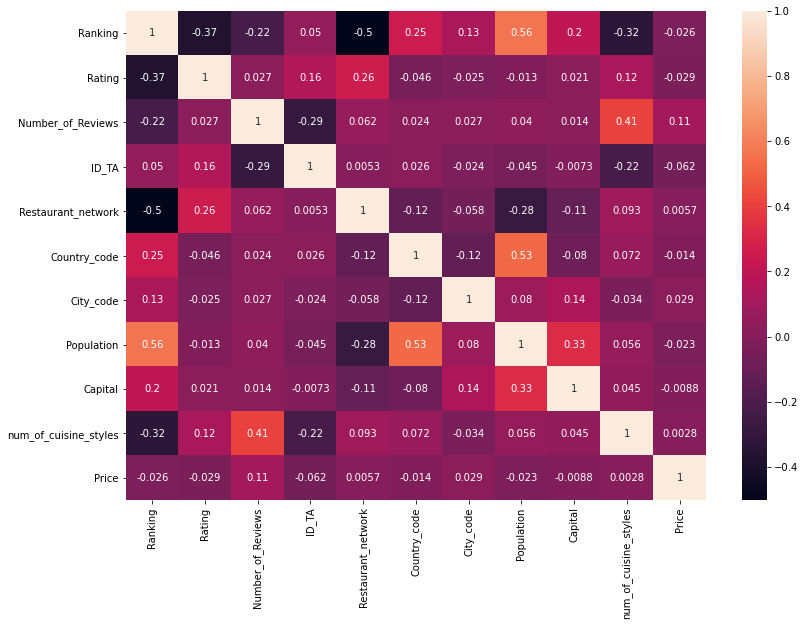

In [66]:
fig = plt.figure(figsize=(13,9))

sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [87]:
ols_model_multi(data['Rating'][data['sample']==1], data[data['sample']==1].drop(['Rating', 'sample', 'Population', 'Number_of_Reviews', 'num_of_cuisine_styles'], axis=1))

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.547e+05
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        11:06:17   Log-Likelihood:                         -45989.
No. Observations:               40000   AIC:                                  9.199e+04
Df Residuals:                   39993   BIC:                                  9.205e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

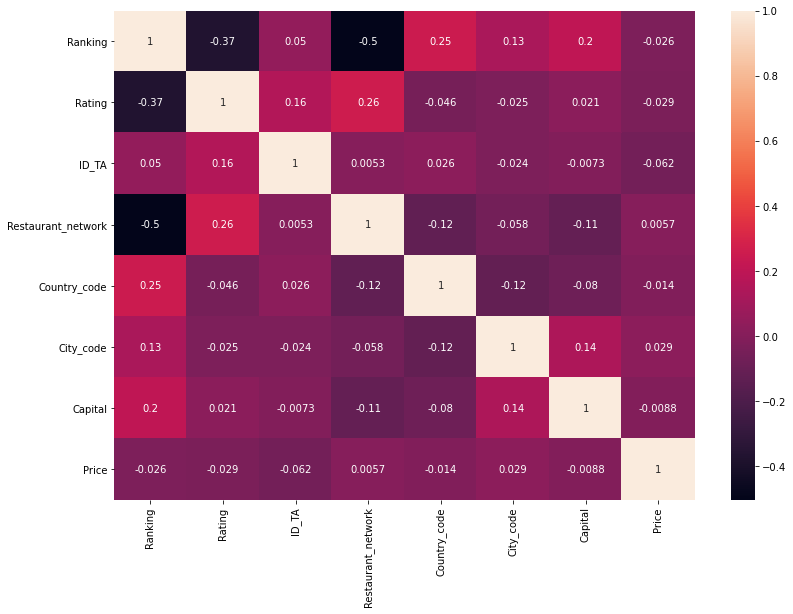

In [88]:
fig = plt.figure(figsize=(13,9))

sns.heatmap(data.drop(['sample', 'Population', 'Number_of_Reviews', 'num_of_cuisine_styles'], axis=1).corr(), annot=True)

In [192]:
data.to_csv(DATA_PATH+'prep_data.csv', index=False)

# Pandas profiling

In [98]:
# profile = ProfileReport(data, title='Tripadvisor restaurants')
# profile.to_file('../eda/trip_rest_pandas_profiling.html')

# Sweetviz

In [97]:
# comparison_report = sv.analyze(data)
# comparison_report.show_html('../eda/trip_rest_sweetviz.html')